Saving binary.dta to binary.dta
First 5 rows:
    admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 6.4 KB
None

Summary statistics:
             admit         gre         gpa        rank
count  400.000000  400.000000  400.000000  400.000000
mean     0.317500  587.700012    3.389900    2.485000
std      0.466087  115.516663    0.380567    0.944462
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.395000    2.00000

/tmp/ipython-input-618326258.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="rank", y="admit", data=df, ci=None)


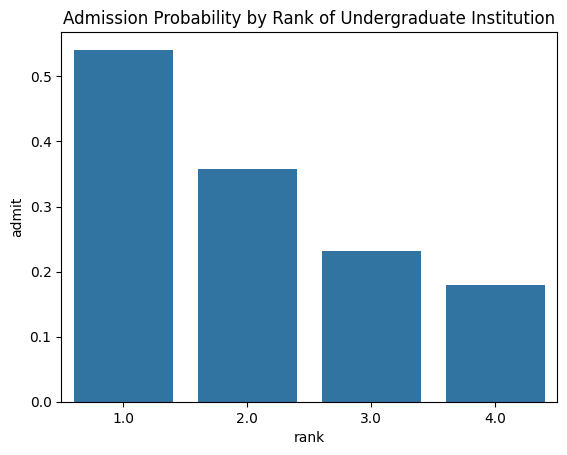

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import statsmodels.api as sm
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_stata(file_name)

print("First 5 rows:\n", df.head())
print("\nDataset info:\n")
print(df.info())
print("\nSummary statistics:\n", df.describe())

X = df[['gre', 'gpa', 'rank']]
y = df['admit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_sm = sm.add_constant(X)
model = sm.Logit(y, X_sm)
result = model.fit()

print("\nStatsmodels Logistic Regression Summary:\n")
print(result.summary())

sns.barplot(x="rank", y="admit", data=df, ci=None)
plt.title("Admission Probability by Rank of Undergraduate Institution")
plt.show()


Saving binary.csv to binary.csv
First 5 rows:
    admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None

Summary statistics:
             admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%   

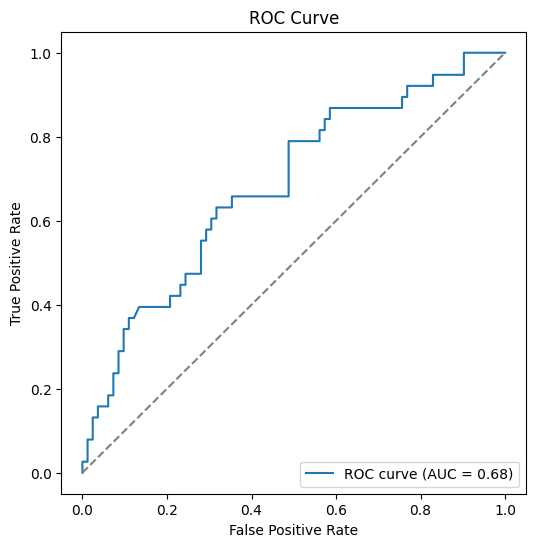

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

import statsmodels.api as sm
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print("First 5 rows:\n", df.head())
print("\nDataset info:\n")
print(df.info())
print("\nSummary statistics:\n", df.describe())

X = df[['gre', 'gpa', 'rank']]
y = df['admit']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_sm = sm.add_constant(X)
model = sm.Logit(y, X_sm)
result = model.fit()
print("\nStatsmodels Logistic Regression Summary:\n")
print(result.summary())

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Saving synthetic_online_retail.csv to synthetic_online_retail (1).csv
Accuracy: 0.7733333333333333
Confusion Matrix:
 [[23 18]
 [16 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.57        41
           1       0.84      0.85      0.85       109

    accuracy                           0.77       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.77      0.77      0.77       150



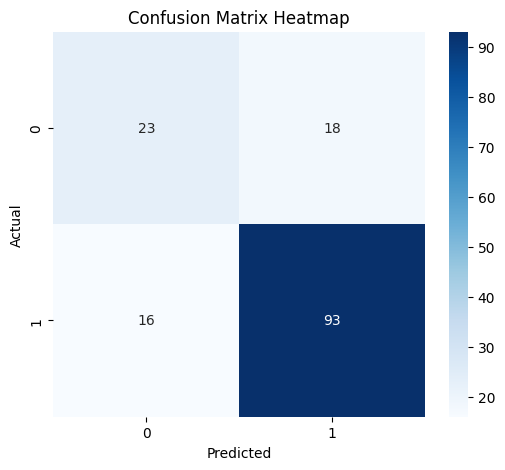

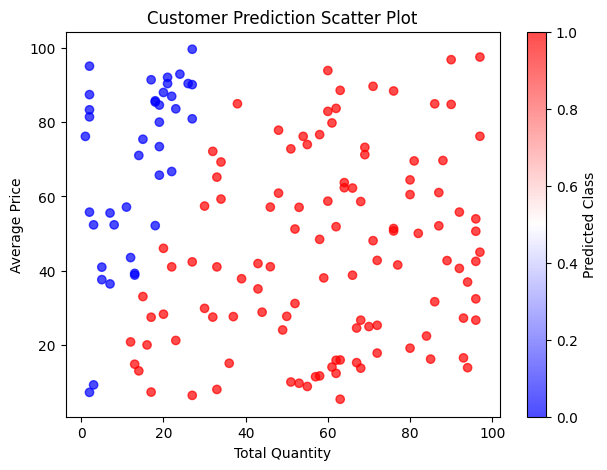

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('synthetic_online_retail.csv')

X = df[["TotalQty", "AvgPrice"]]
y = df["BoughtTarget"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X_test["TotalQty"], X_test["AvgPrice"], c=y_pred, cmap="bwr", alpha=0.7)
plt.xlabel("Total Quantity")
plt.ylabel("Average Price")
plt.title("Customer Prediction Scatter Plot")
plt.colorbar(label="Predicted Class")
plt.show()
